## Imports

In [ ]:
import os
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns

## Step 1: Load Data from Files

### 1.1. Load INX and SIMX Files

In [1]:
def load_inx_file(filepath):
    with open(filepath, 'r') as file:
        data = file.readlines()
    return data

def load_simx_file(filepath):
    with open(filepath, 'r') as file:
        data = file.readlines()
    return data

In [2]:
# One directory up to the project root
base_dir = os.path.dirname(os.getcwd())

# Status quo directory path
statusquo_dir = os.path.join(base_dir, 'data', 'statusquo')

# Relative paths
inx_file = os.path.join(statusquo_dir, 'Playground_statusquo.INX')
simx_file = os.path.join(statusquo_dir, 'Playground_statusquo.simx')

# Load the files
inx_data = load_inx_file(inx_file)
simx_data = load_simx_file(simx_file)

# Displaying a snippet of the data (for debugging)
print("INX File Data:", inx_data[:5])  # first 5 lines
print("SIMX File Data:", simx_data[:5])


INX File Data: ['<ENVI-MET_Datafile>\n', '<Header>\n', '<filetype>INPX ENVI-met Area Input File</filetype>\n', '<version>440</version>\n', '<revisiondate>13.09.2024 19:32:05</revisiondate>\n']
SIMX File Data: ['<ENVI-MET_Datafile>\n', '<Header>\n', '<filetype>SIMX</filetype>\n', '<version>2</version>\n', '<revisiondate>13.09.2024 17:58:04</revisiondate>\n']


### 1.2 Load Climate Input (FOX) Data

In [3]:
# Relative paths the FOX file
fox_file = os.path.join(statusquo_dir, 'Playground.FOX')

# Function to load the FOX file
def load_fox_file(filepath):
    with open(filepath, 'r') as file:
        data = file.readlines()
    return data

# Load FOX data
fox_data = load_fox_file(fox_file)

# Display a snippet of the climate input data
print("FOX File Data:", fox_data[:5])

FOX File Data: ['{\n', '    "fileType": "ENVI-met JSON Forcing File",\n', '    "metaData": {\n', '        "fileDescription": "FULL FORCING FOR ENVI-met",\n', '        "remark": "",\n']


## Step 2: Extract and Visualize Data

### Work with the .nc File

##### 1. Loading the netCDF File:

In [7]:
# Use the current working directory but go one directory up to the project root
#base_dir = os.path.dirname(os.getcwd())  # Go up one directory level

# Define the status quo directory path
#statusquo_dir = os.path.join(base_dir, 'data', 'statusquo')

# Use relative paths for your .nc file
nc_file = os.path.join(statusquo_dir, 'Playground_2024-07-06_04.00.00.nc')

# Load the netCDF file using xarray
ds = xr.open_dataset(nc_file)

# Explore the contents of the netCDF file
print(ds)


<xarray.Dataset> Size: 10GB
Dimensions:                                (Time: 25, GridsI: 100, GridsJ: 100,
                                            GridsK: 29, SoilLevels: 19)
Coordinates:
  * Time                                   (Time) datetime64[ns] 200B 2024-07...
  * GridsI                                 (GridsI) float32 400B 5.0 ... 263.8
  * GridsJ                                 (GridsJ) float32 400B 5.0 ... 263.8
  * GridsK                                 (GridsK) float32 116B 0.3 ... 73.5
  * SoilLevels                             (SoilLevels) float32 76B 0.005 ......
Data variables: (12/378)
    crs                                    int32 4B ...
    UTM_X                                  (GridsJ, GridsI) float32 40kB ...
    UTM_Y                                  (GridsJ, GridsI) float32 40kB ...
    Lon                                    (GridsJ, GridsI) float32 40kB ...
    Lat                                    (GridsJ, GridsI) float32 40kB ...
    GridIndex       

##### 2. Downsampling or Slicing the Data

In [10]:
# Check the available values for GridsK (height levels)
print(ds['GridsK'].values)


[ 0.3  0.9  1.5  2.1  2.7  4.5  7.5 10.5 13.5 16.5 19.5 22.5 25.5 28.5
 31.5 34.5 37.5 40.5 43.5 46.5 49.5 52.5 55.5 58.5 61.5 64.5 67.5 70.5
 73.5]


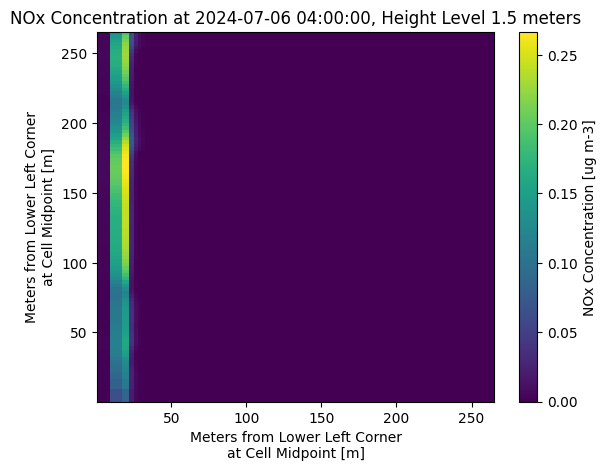

In [11]:
# Select data for a specific time step and height level
time_step = '2024-07-06 04:00:00'
height_level = 1.5  # Choosing one of the valid height levels

# Example: Let's extract NOx concentration for this time and height level
nox_concentration = ds['NOxConc'].sel(Time=time_step, GridsK=height_level)

# Plot the NOx concentration for this time and height
nox_concentration.plot(cmap='viridis')
plt.title(f'NOx Concentration at {time_step}, Height Level {height_level} meters')
plt.show()


In [13]:
# List all variables in the dataset
print(ds.data_vars)


Data variables:
    crs                                    int32 4B ...
    UTM_X                                  (GridsJ, GridsI) float32 40kB ...
    UTM_Y                                  (GridsJ, GridsI) float32 40kB ...
    Lon                                    (GridsJ, GridsI) float32 40kB ...
    Lat                                    (GridsJ, GridsI) float32 40kB ...
    GridIndex                              (Time, GridsJ, GridsI) float64 2MB ...
    SoilProfileType                        (Time, GridsJ, GridsI) float64 2MB ...
    ZTopo                                  (Time, GridsJ, GridsI) float64 2MB ...
    DEMOffset                              (Time, GridsJ, GridsI) float64 2MB ...
    Inclination                            (Time, GridsJ, GridsI) float32 1MB ...
    Exposition                             (Time, GridsJ, GridsI) float32 1MB ...
    ShadowFlag                             (Time, GridsJ, GridsI) float64 2MB ...
    TSurf                                  (Ti

##### Visualizing Surface Temperature (TSurf)

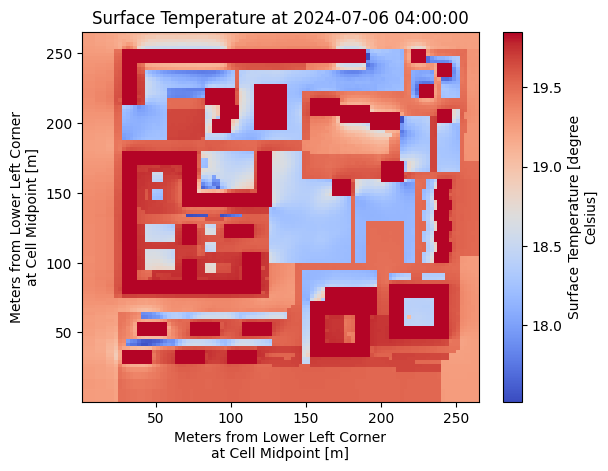

In [14]:
import matplotlib.pyplot as plt

# Select the time step and height level
time_step = '2024-07-06 04:00:00'  # Example time step
# TSurf is a 2D variable (Time, GridsJ, GridsI), so no height level needed

# Extract the surface temperature data for the specific time step
surface_temperature = ds['TSurf'].sel(Time=time_step)

# Plot the surface temperature as a heatmap
surface_temperature.plot(cmap='coolwarm')
plt.title(f'Surface Temperature at {time_step}')
plt.show()

Compare Different Time Steps

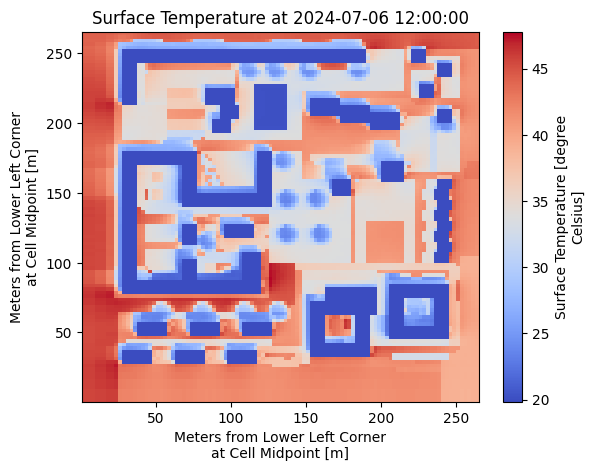

In [15]:
# Select another time step
time_step2 = '2024-07-06 12:00:00'  # Noon time, for example
surface_temperature_time2 = ds['TSurf'].sel(Time=time_step2)

# Plot surface temperature at the new time
surface_temperature_time2.plot(cmap='coolwarm')
plt.title(f'Surface Temperature at {time_step2}')
plt.show()


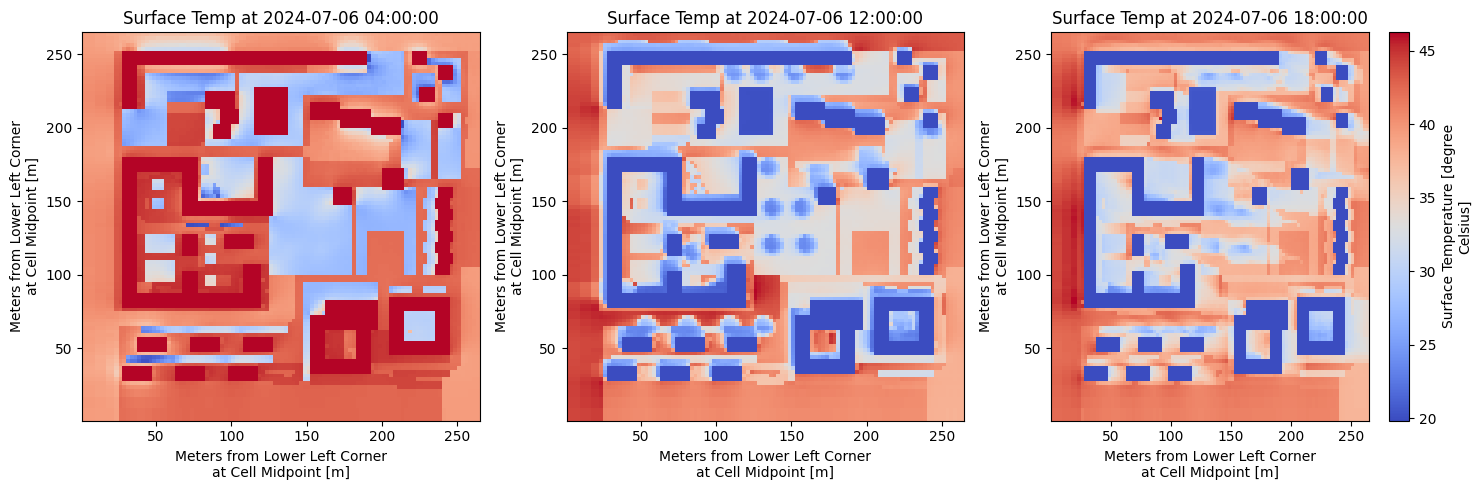

In [16]:
# Define the time steps to compare
time_steps = ['2024-07-06 04:00:00', '2024-07-06 12:00:00', '2024-07-06 18:00:00']

# Set up a figure with subplots (one subplot per time step)
fig, axes = plt.subplots(nrows=1, ncols=len(time_steps), figsize=(15, 5))

# Loop over the time steps and plot each one in a subplot
for i, time_step in enumerate(time_steps):
    # Select the surface temperature for the current time step
    surface_temperature = ds['TSurf'].sel(Time=time_step)
    
    # Plot it in the corresponding subplot
    surface_temperature.plot(ax=axes[i], cmap='coolwarm', add_colorbar=(i == len(time_steps) - 1))
    axes[i].set_title(f'Surface Temp at {time_step}')
    
# Adjust layout for clarity
plt.tight_layout()
plt.show()


In [17]:
# Check the number of time steps in the dataset
num_time_steps = ds.dims['Time']
print(f'Total number of time steps: {num_time_steps}')

# Optionally, print all available time steps
print(ds['Time'].values)


Total number of time steps: 25
['2024-07-06T04:00:00.000000000' '2024-07-06T05:00:00.000000000'
 '2024-07-06T06:00:00.000000000' '2024-07-06T07:00:00.000000000'
 '2024-07-06T08:00:00.000000000' '2024-07-06T09:00:00.000000000'
 '2024-07-06T10:00:00.000000000' '2024-07-06T11:00:00.000000000'
 '2024-07-06T12:00:00.000000000' '2024-07-06T13:00:00.000000000'
 '2024-07-06T14:00:00.000000000' '2024-07-06T15:00:00.000000000'
 '2024-07-06T16:00:00.000000000' '2024-07-06T17:00:00.000000000'
 '2024-07-06T18:00:00.000000000' '2024-07-06T19:00:00.000000000'
 '2024-07-06T20:00:00.000000000' '2024-07-06T21:00:00.000000000'
 '2024-07-06T22:00:00.000000000' '2024-07-06T23:00:00.000000000'
 '2024-07-07T00:00:00.000000000' '2024-07-07T01:00:00.000000000'
 '2024-07-07T02:00:00.000000000' '2024-07-07T03:00:00.000000000'
 '2024-07-07T03:59:58.001862000']


C:\Users\Ekaterina Vititneva\AppData\Local\Temp\ipykernel_51812\644583613.py:2: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  num_time_steps = ds.dims['Time']


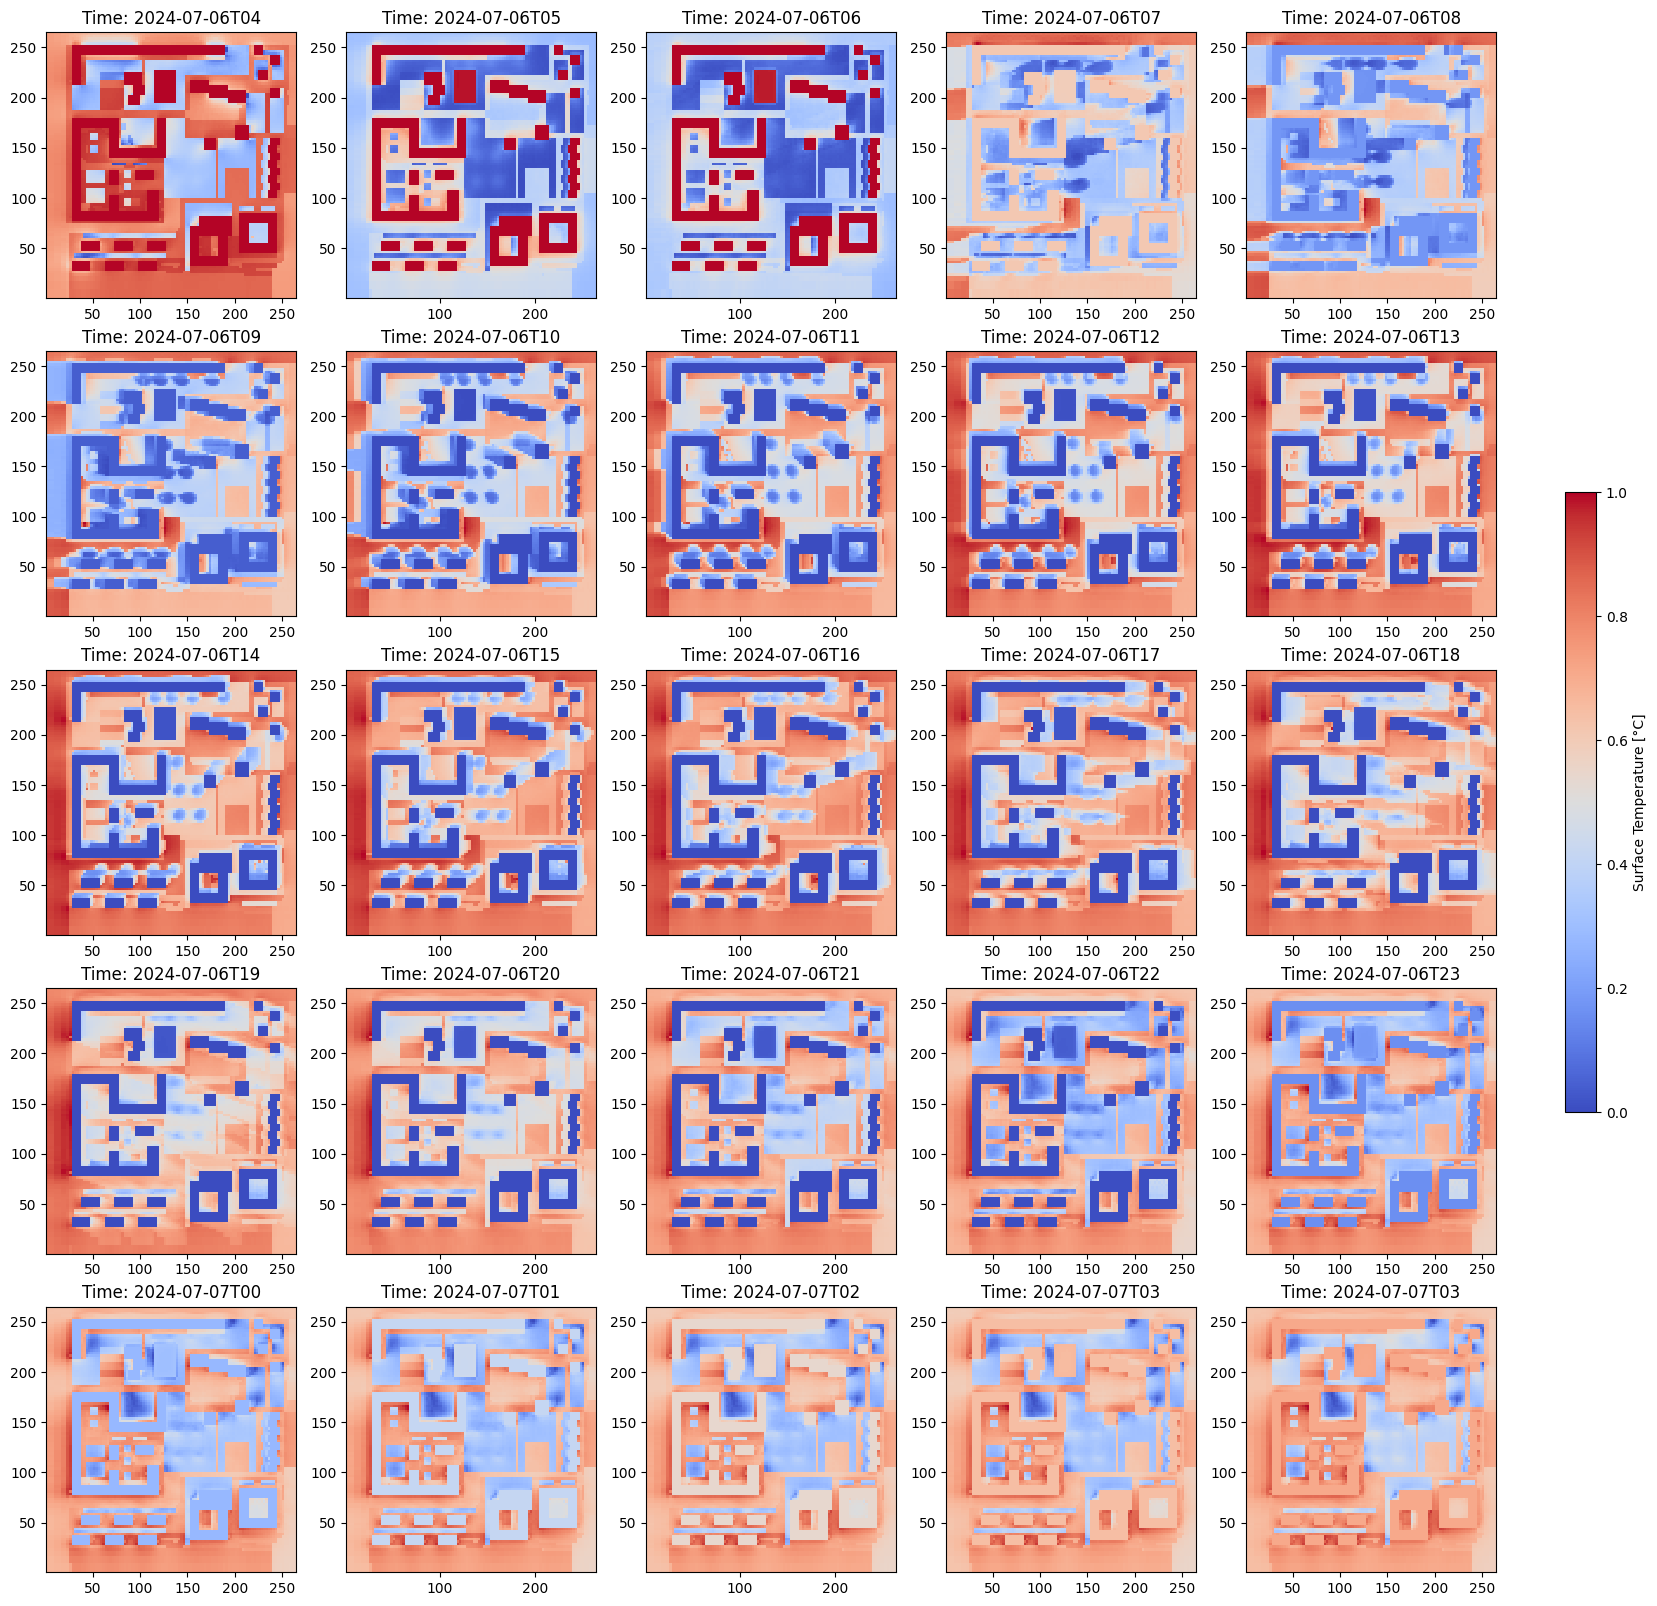

In [23]:
# Set up a grid layout with 5 rows and 5 columns for the 25 time steps
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 20))

# Flatten the axes array to loop over it easily
axes = axes.flatten()

# Loop over each time step and plot it in a subplot
for i, time_step in enumerate(ds['Time'].values):
    # Select the surface temperature for the current time step
    surface_temperature = ds['TSurf'].sel(Time=time_step)
    
    # Plot it in the corresponding subplot
    surface_temperature.plot(ax=axes[i], cmap='coolwarm', add_colorbar=False)
    axes[i].set_title(f'Time: {str(time_step)[:13]}')  # Show only the hour in the title
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Add a colorbar outside the grid
cbar = fig.colorbar(plt.cm.ScalarMappable(cmap='coolwarm'), ax=axes, orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_label('Surface Temperature [°C]')

# Adjust layout to avoid overlap
plt.subplots_adjust(right=0.85)  # Leaves space on the right for the colorbar
plt.show()


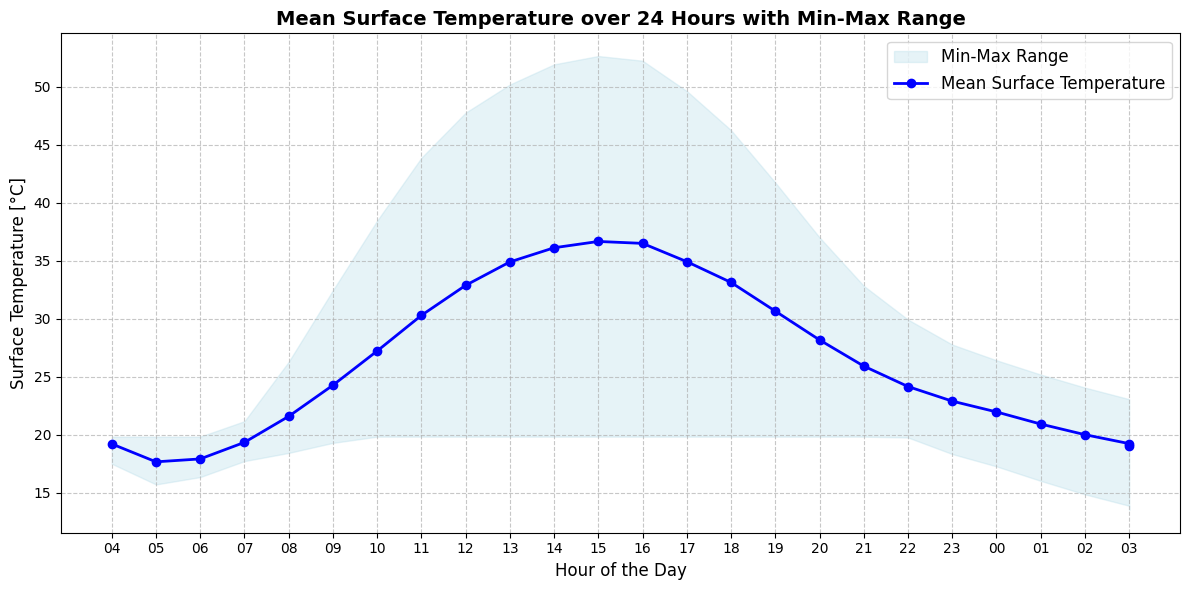

In [26]:
import matplotlib.pyplot as plt

# Select the surface temperature variable
surface_temperature = ds['TSurf']

# Calculate the mean, min, and max surface temperature across the grid for each time step
mean_surface_temperature = surface_temperature.mean(dim=['GridsI', 'GridsJ'])
min_surface_temperature = surface_temperature.min(dim=['GridsI', 'GridsJ'])
max_surface_temperature = surface_temperature.max(dim=['GridsI', 'GridsJ'])

# Extract the time values (in hours) for labeling the x-axis
time_hours = [str(t)[11:13] for t in ds['Time'].values]  # Extract only the hour from the time

# Plot the enhanced time series plot
plt.figure(figsize=(12, 6))

# Fill the area between the min and max temperatures to create a shaded region
plt.fill_between(time_hours, min_surface_temperature, max_surface_temperature, color='lightblue', alpha=0.3, label='Min-Max Range')

# Plot the mean surface temperature with a smooth line and markers
plt.plot(time_hours, mean_surface_temperature, marker='o', color='b', label='Mean Surface Temperature', linestyle='-', linewidth=2, markersize=6)

# Add labels, title, and a legend
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Surface Temperature [°C]', fontsize=12)
plt.title('Mean Surface Temperature over 24 Hours with Min-Max Range', fontsize=14, fontweight='bold')

# Customize grid and ticks for better readability
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add a legend to explain the shaded region and the mean line
plt.legend(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


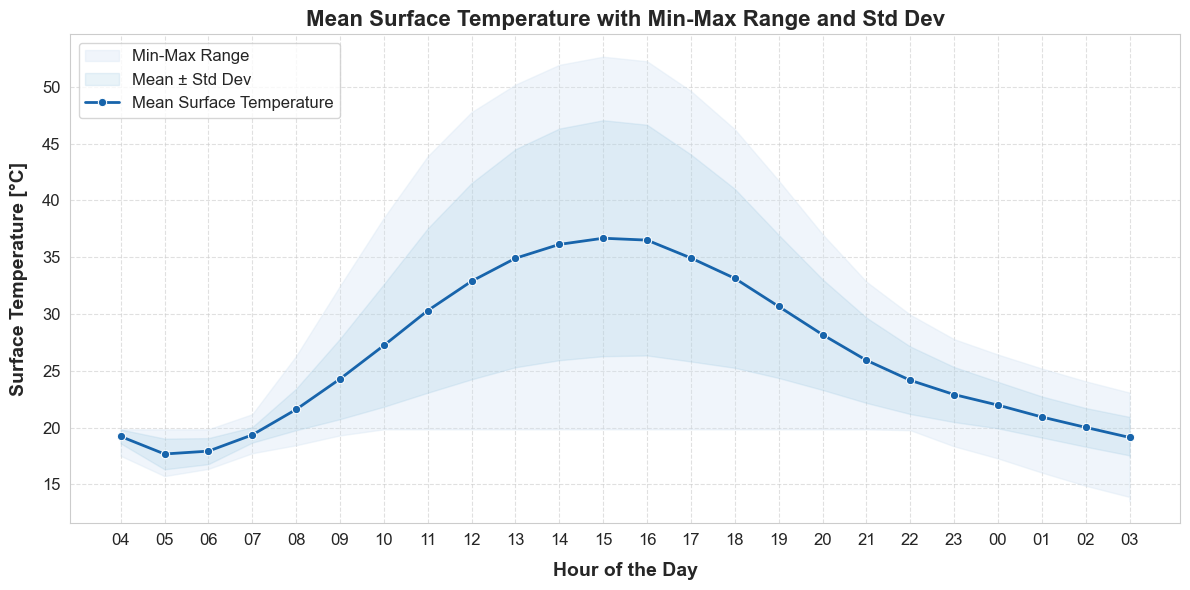

In [33]:
# Apply a Seaborn style (try different options: 'darkgrid', 'whitegrid', 'dark', 'white', 'ticks')
sns.set_style("whitegrid")

# Use a blue color palette
palette = sns.color_palette("Blues", as_cmap=True)

# Select the surface temperature variable
surface_temperature = ds['TSurf']

# Calculate the mean, min, max, and standard deviation of surface temperature across the grid
mean_surface_temperature = surface_temperature.mean(dim=['GridsI', 'GridsJ'])
min_surface_temperature = surface_temperature.min(dim=['GridsI', 'GridsJ'])
max_surface_temperature = surface_temperature.max(dim=['GridsI', 'GridsJ'])
std_surface_temperature = surface_temperature.std(dim=['GridsI', 'GridsJ'])  # Standard deviation

# Extract the time values (in hours) for labeling the x-axis
time_hours = [str(t)[11:13] for t in ds['Time'].values]  # Extract only the hour from the time

# Create a Seaborn figure
plt.figure(figsize=(12, 6))

# Fill the area between the min and max temperatures (use Seaborn color palette)
plt.fill_between(time_hours, min_surface_temperature, max_surface_temperature, color=palette(0.2), alpha=0.3, label='Min-Max Range')

# Add shaded region for mean ± standard deviation
plt.fill_between(time_hours, 
                 mean_surface_temperature - std_surface_temperature, 
                 mean_surface_temperature + std_surface_temperature, 
                 color=palette(0.4), alpha=0.2, label='Mean ± Std Dev')

# Plot the mean surface temperature with a Seaborn lineplot
sns.lineplot(x=time_hours, y=mean_surface_temperature, marker='o', color=palette(0.8), label='Mean Surface Temperature', linewidth=2)

# Customize the grid, ticks, and fonts for a cleaner look
plt.xticks(fontsize=12, ha='center')  # Align the x-axis labels horizontally (centered)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)  # Softer gridlines

# Add labels, title, and a legend with improved font size
plt.xlabel('Hour of the Day', fontsize=14, labelpad=10, fontweight='bold')
plt.ylabel('Surface Temperature [°C]', fontsize=14, labelpad=10, fontweight='bold')
plt.title('Mean Surface Temperature with Min-Max Range and Std Dev', fontsize=16, fontweight='bold')

# Adjust legend position and font size
plt.legend(fontsize=12, loc='upper left')

# Tighten the layout
plt.tight_layout()

# Show the final plot
plt.show()
